In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Calculate MMD
def mmd_rbf(X, Y, gamma=1.0):
    """Calculates the MMD distance using a Gaussian kernel."""
    n = len(X)
    m = len(Y)
    K_XX = rbf_kernel(X.reshape(-1, 1), X.reshape(-1, 1), gamma=gamma)
    K_YY = rbf_kernel(Y.reshape(-1, 1), Y.reshape(-1, 1), gamma=gamma)
    K_XY = rbf_kernel(X.reshape(-1, 1), Y.reshape(-1, 1), gamma=gamma)
    return (1.0 / (n * (n - 1))) * np.sum(K_XX) + (1.0 / (m * (m - 1))) * np.sum(K_YY) - (2.0 / (n * m)) * np.sum(K_XY)


In [3]:
from matplotlib.pyplot import hist


hist_all = np.load('..\\hist_all.npy', allow_pickle=True)
hist_M1 = hist_all[0]
hist_tongue = hist_all[1]
hist_M2 = hist_all[2]

# hist_M1 = hist_M1[hist_tongue<0.55]
# hist_M2 = hist_M2[hist_tongue<0.55]
# hist_tongue = hist_tongue[hist_tongue<0.55]

In [4]:
len(hist_tongue)*0.25/60

9.166666666666666

In [5]:
def compute_normality(data):
  """
  Computes how normal an empirical distribution is using the Shapiro-Wilk test.

  Args:
    data: A NumPy array representing the empirical distribution.

  Returns:
    A tuple containing:
      - The p-value of the Shapiro-Wilk test.
      - A boolean indicating whether the distribution is considered normal (True) or not (False).
  """

  # Perform the Shapiro-Wilk test
  statistic, pvalue = shapiro(data)

  # Set a significance level (alpha) for the test
  alpha = 0.05

  # Determine if the distribution is considered normal
  is_normal = pvalue > alpha

  return pvalue, is_normal

Text(0.5, 1.0, 'Left vs right MI \n Shapiro-Wilk p-value: 0.0')

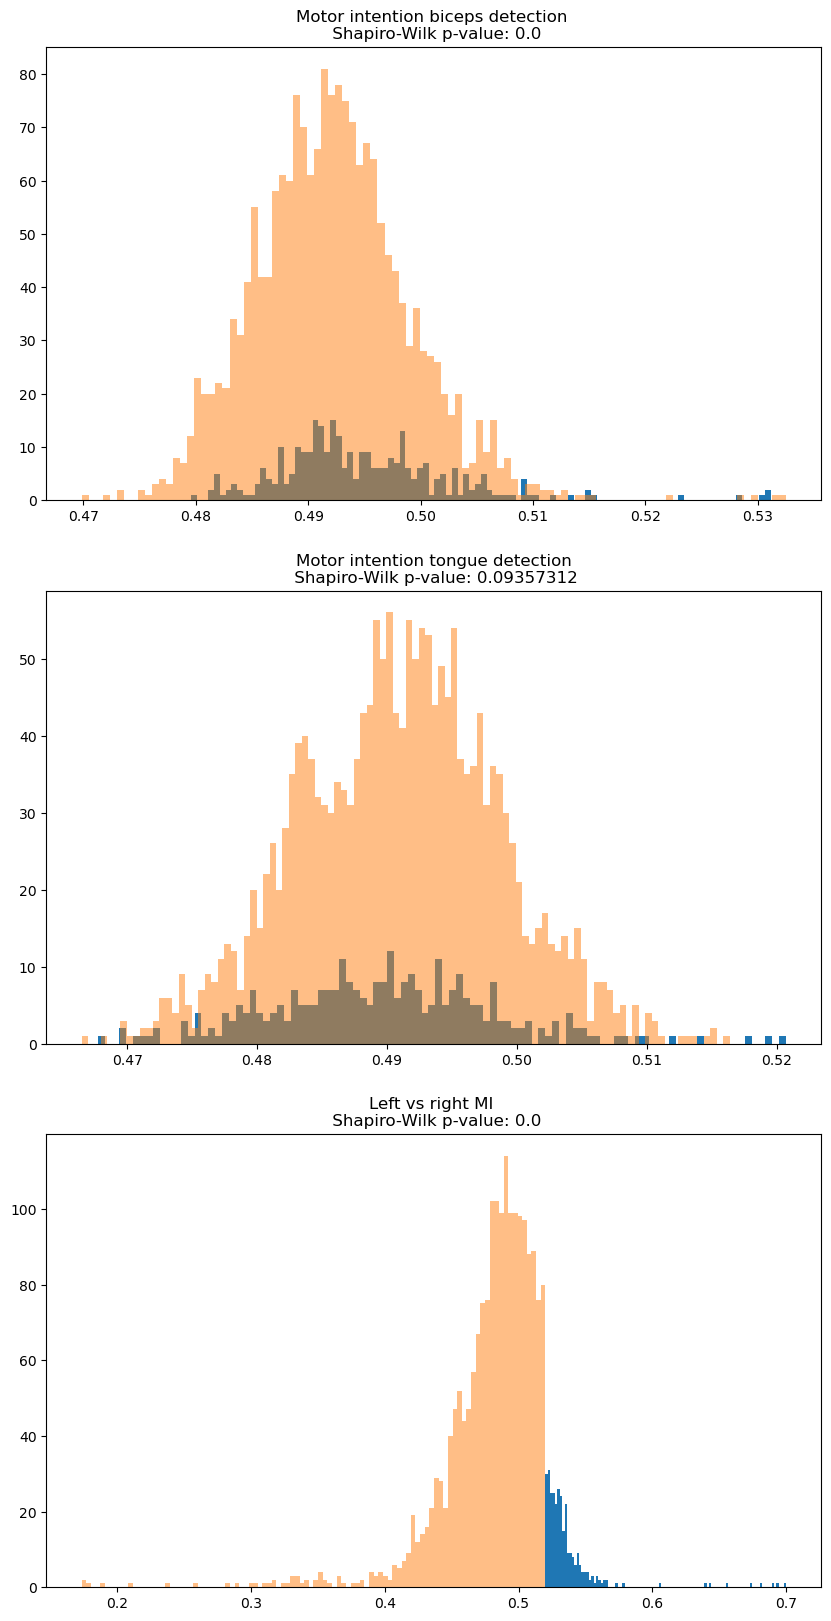

In [9]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
_ = plt.hist(hist_M1[hist_M2>=0.52], bins=100)
_ = plt.hist(hist_M1[hist_M2<0.52], bins=100, alpha = 0.5)
pvalue, is_normal = compute_normality(hist_M1)
plt.title(f'Motor intention biceps detection \n Shapiro-Wilk p-value: {round(pvalue,8)}')
plt.subplot(3,1,2)
_ = plt.hist(hist_tongue[hist_M2>=0.52], bins=100)
_ = plt.hist(hist_tongue[hist_M2<0.52], bins=100, alpha = 0.5)
pvalue, is_normal = compute_normality(hist_tongue)
plt.title(f'Motor intention tongue detection\n Shapiro-Wilk p-value: {round(pvalue,8)}')
plt.subplot(3,1,3)
_ = plt.hist(hist_M2[hist_M2>=0.52], bins=100)
_ = plt.hist(hist_M2[hist_M2<0.52], bins=100, alpha = 0.5)
pvalue, is_normal = compute_normality(hist_M2)
plt.title(f'Left vs right MI \n Shapiro-Wilk p-value: {round(pvalue,8)}')

In [7]:
len(hist_tongue)*0.25/60

9.166666666666666

## MMD

In [8]:
hist_M1_high = hist_M1[hist_M1>=0.502]
hist_M1_low = hist_M1[hist_M1<0.502]

# Calculate MMD for original data
mmd_original = mmd_rbf(hist_M1_high, hist_M1_low)

# Random permutations
num_permutations = 1000
mmd_permutations = []
for _ in range(num_permutations):
    data_shuffled = np.concatenate((hist_M1_high, hist_M1_low))
    np.random.shuffle(data_shuffled)
    X_shuffled = data_shuffled[:len(hist_M1_high)]
    Y_shuffled = data_shuffled[len(hist_M1_high):]
    mmd_permutations.append(mmd_rbf(X_shuffled, Y_shuffled))

# Calculate p-value
p_value = np.sum(np.array(mmd_permutations) >= mmd_original) / num_permutations

print(f"MMD Distance: {mmd_original}")
print(f"P-value: {p_value}")

KeyboardInterrupt: 

In [ ]:
hist_M1_high = hist_tongue[hist_M1>=0.502]
hist_M1_low = hist_tongue[hist_M1<0.502]

# Calculate MMD for original data
mmd_original = mmd_rbf(hist_M1_high, hist_M1_low)

# Random permutations
num_permutations = 1000
mmd_permutations = []
for _ in range(num_permutations):
    data_shuffled = np.concatenate((hist_M1_high, hist_M1_low))
    np.random.shuffle(data_shuffled)
    X_shuffled = data_shuffled[:len(hist_M1_high)]
    Y_shuffled = data_shuffled[len(hist_M1_high):]
    mmd_permutations.append(mmd_rbf(X_shuffled, Y_shuffled))

# Calculate p-value
p_value = np.sum(np.array(mmd_permutations) >= mmd_original) / num_permutations

print(f"MMD Distance: {mmd_original}")
print(f"P-value: {p_value}")

KeyboardInterrupt: 

In [ ]:
hist_M1_high = hist_M2[hist_M1>=0.502]
hist_M1_low = hist_M2[hist_M1<0.502]

# Calculate MMD for original data
mmd_original = mmd_rbf(hist_M1_high, hist_M1_low)

# Random permutations
num_permutations = 1000
mmd_permutations = []
for _ in range(num_permutations):
    data_shuffled = np.concatenate((hist_M1_high, hist_M1_low))
    np.random.shuffle(data_shuffled)
    X_shuffled = data_shuffled[:len(hist_M1_high)]
    Y_shuffled = data_shuffled[len(hist_M1_high):]
    mmd_permutations.append(mmd_rbf(X_shuffled, Y_shuffled))

# Calculate p-value
p_value = np.sum(np.array(mmd_permutations) >= mmd_original) / num_permutations

print(f"MMD Distance: {mmd_original}")
print(f"P-value: {p_value}")